<a href="https://colab.research.google.com/github/baranouskiart/fiverr-crm_consultant/blob/main/crm_exprerts_fiverr_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Import & Cleaning

Source: https://github.com/baranouskiart/fiverr-crm_consultant/blob/main/fiverr.csv



In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import autoviz

In [3]:
url = 'https://raw.githubusercontent.com/baranouskiart/fiverr-crm_consultant/main/fiverr.csv'

In [4]:
df = pd.read_csv(url, error_bad_lines=False)
df.head(1)

<ipython-input-4-33584d05f30d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url, error_bad_lines=False)


,media href,Y1BXLWZ,ziXAPIc src,text-bold href,mgCk4Qq,tbody-6,Bh6SL1u,rating-score,ratings-count,rating-count-number,text-bold 2
0,https://www.fiverr.com/masdouk_zoho/be-your-zo...,M,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/masdouk_zoho?source=gig...,Masdouk A.,FIVERR'S,"I will be your zoho expert, zoho developer and...",5.0,(),150.0,€96


In [5]:
# Rename columns for readability
column_names = [
    "Profile Link", "Profile Code", "Profile Image", "Gig Link", "Freelancer Name", "Level", "Description",
    "Rating Score", "Ratings Count Convert", "Reviews Count", "Price"
]
df.columns = column_names

# Remove dashes from column names
df.columns = df.columns.str.replace(' ', '_')

In [19]:
df.shape

(1008, 12)

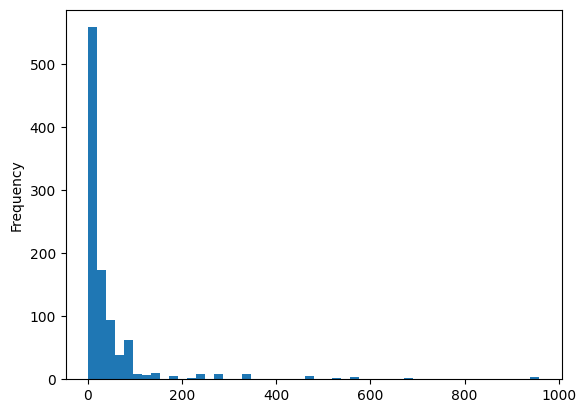

In [38]:
df['Price'].plot(kind='hist', bins=50)

plt.show()

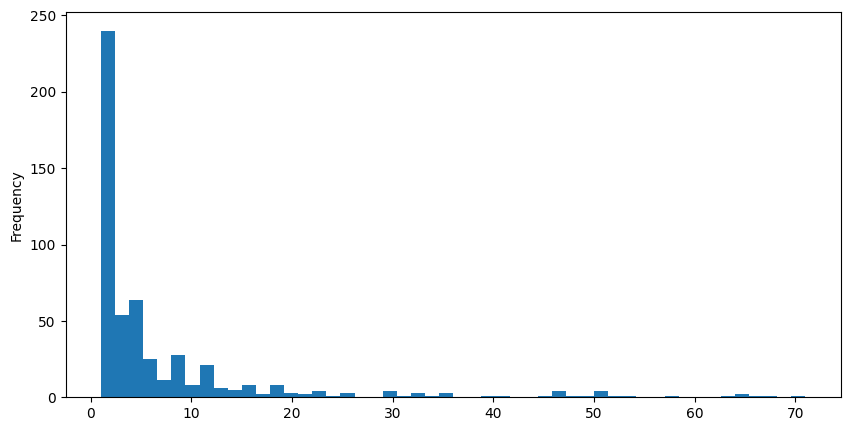

In [39]:
plt.figure(figsize=(10, 5))
df[df['Reviews_Count'] < 80]['Reviews_Count'].plot(kind='hist', bins=50)

plt.show()

## Data Preprocessing


In [14]:
# Extract relevant information (name, level, rating, price) from the available columns
df['Price'] = df['Price'].str.extract(r'€(\d+)').astype(float)

In [15]:
df['User_Name'] = df['Gig_Link'].str.split('/').str[-1].str.split('?').str[0]

In [16]:
df['Level'] = df['Level'].str.extract(r'Level (\d+)').astype(float)
df['Rating_Score'] = df['Rating_Score'].astype(float)

In [32]:
rank_nan = df['Rating_Score'].isna().sum()
rank_not_nan = df['Rating_Score'].notna().sum()

In [33]:
lev_nan = df['Level'].isna().sum()
lev_not_nan = df['Level'].notna().sum()

In [34]:
df['Level'] = df['Level'].fillna(0)

In [35]:
df.describe()

,Level,Rating_Score,Reviews_Count,Price
count,1008.000000,533.000000,533.000000,1008.000000
mean,0.397817,4.944653,8.842402,50.502976
std,0.679882,0.208545,18.363844,99.829020
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,5.000000,1.000000,10.000000
50%,0.000000,5.000000,3.000000,20.000000
75%,1.000000,5.000000,8.000000,48.000000
max,2.000000,5.000000,154.000000,958.000000



## Statistical Measure



In [23]:
# Calculate statistical measures for variables like ratings, number of orders, and prices

mean_rating = df['Rating_Score'].mean()
median_price = df['Price'].median()
std_dev_orders = df['Reviews_Count'].std()

In [36]:
df # Example questions: What services does each seller provide? What is their pricing? What is their expertise level?


,Profile_Link,Profile_Code,Profile_Image,Gig_Link,Freelancer_Name,Level,Description,Rating_Score,Ratings_Count_Convert,Reviews_Count,Price,User_Name
0,https://www.fiverr.com/masdouk_zoho/be-your-zo...,M,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/masdouk_zoho?source=gig...,Masdouk A.,0.0,"I will be your zoho expert, zoho developer and...",5.0,(),150.0,96.0,masdouk_zoho
1,https://www.fiverr.com/profx_digitals/set-up-a...,E,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/profx_digitals?source=g...,Emmanuel O,2.0,I will set up and customize zoho crm zoho one ...,5.0,(),154.0,10.0,profx_digitals
2,https://www.fiverr.com/stevejoe05/set-up-zoho-...,S,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/stevejoe05?source=gig_c...,Steve Joe,1.0,"I will set up zoho CRM, zoho campaigns, zoho b...",5.0,(),20.0,15.0,stevejoe05
3,https://www.fiverr.com/crmexpert111/create-pod...,C,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/crmexpert111?source=gig...,Crm Expert,0.0,I will create podio crm with complete integrat...,4.3,(),12.0,5.0,crmexpert111
4,https://www.fiverr.com/joelturcotte/consult-se...,J,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/joelturcotte?source=gig...,Joel,0.0,I will streamline your sales process setup and...,4.9,(),21.0,96.0,joelturcotte
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,https://www.fiverr.com/thesaleslion/do-migrati...,Z,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/thesaleslion?source=gig...,Zoho Expert,0.0,I will do migration from quickbooks to zoho books,NaN,NaN,NaN,58.0,thesaleslion
1004,https://www.fiverr.com/zapierexpert75/zapier-a...,I,NaN,https://www.fiverr.com/zapierexpert75?source=g...,Ikram,0.0,I will do zapier integration and automation,5.0,(),1.0,15.0,zapierexpert75
1005,https://www.fiverr.com/golftechy/zoho-crm-zoho...,G,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/golftechy?source=gig_ca...,Gazal Folarin,1.0,"I will setup zoho crm, zoho books, zoho campai...",NaN,NaN,NaN,20.0,golftechy
1006,https://www.fiverr.com/johnny_johnny01/setup-s...,j,https://fiverr-res.cloudinary.com/t_profile_th...,https://www.fiverr.com/johnny_johnny01?source=...,johnny_johnny01,0.0,"I will setup suitedash client portal,crm manag...",NaN,NaN,NaN,5.0,johnny_johnny01


In [37]:
print(df[['Freelancer_Name', 'Level', 'Rating_Score', 'Price']])

      Freelancer_Name  Level  Rating_Score  Price
0          Masdouk A.    0.0           5.0   96.0
1          Emmanuel O    2.0           5.0   10.0
2           Steve Joe    1.0           5.0   15.0
3          Crm Expert    0.0           4.3    5.0
4                Joel    0.0           4.9   96.0
...               ...    ...           ...    ...
1003      Zoho Expert    0.0           NaN   58.0
1004            Ikram    0.0           5.0   15.0
1005    Gazal Folarin    1.0           NaN   20.0
1006  johnny_johnny01    0.0           NaN    5.0
1007         Victor F    0.0           NaN    5.0

[1008 rows x 4 columns]


# Data Analysis

In [48]:
# Let's see the most popular CRM system from the seller's side
# Assuming you have already loaded and preprocessed the data into the df DataFrame

# Split the descriptions by commas and create a list of CRM keywords
crm_keywords = ['zoho', 'hubspot', 'salesforce', 'pipedrive', 'freshdesk', 'dubsado', 'insightly', 'monday', 'bitrix', 'suitecrm', 'gohighlevel', 'activecampaign', 'crm', 'pipelinedeals', 'wise agent', 'prosperworks', 'kvcore', 'acuity', 'calendly', 'infusionsoft', 'notion', 'sendinblue', 'zendesk', 'wix']

# Initialize a dictionary to store the counts of CRM keywords
crm_counts = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    description = row['Description']
    if isinstance(description, str):  # Make sure the description is a valid string
        for keyword in crm_keywords:
            if keyword in description.lower():  # Check if the keyword exists in the description
                crm_counts[keyword] = crm_counts.get(keyword, 0) + 1

# Convert the dictionary to a DataFrame for easier analysis and visualization
crm_counts_df = pd.DataFrame(crm_counts.items(), columns=['CRM_System', 'Count'])

# Sort the DataFrame by count in descending order
crm_counts_df = crm_counts_df.sort_values(by='Count', ascending=False)

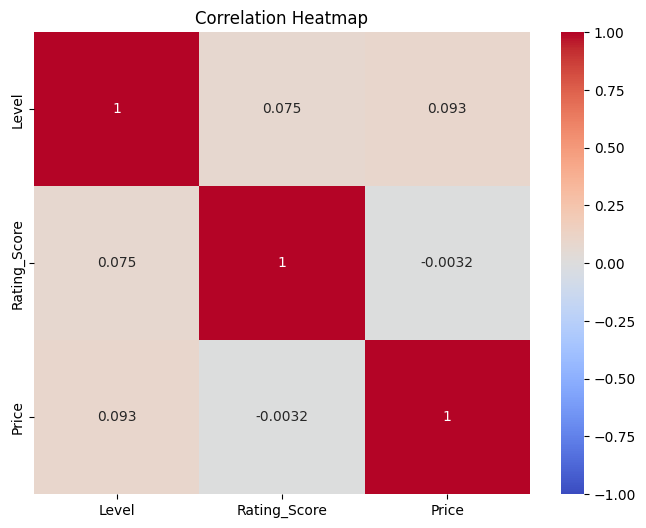

In [52]:
# Select relevant columns for correlation analysis
correlation_columns = ["Level", "Rating_Score", "Price"]
correlation_df = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Correlation

In [64]:
# Print the calculated statistics
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Price: €{median_price:.2f}")
print(f"Standard Deviation of Orders: {std_dev_orders:.2f}")
#print(f"Correlation between Price and Level: {correlation_price_level:.2f}")

Mean Rating: 4.94
Median Price: €20.00
Standard Deviation of Orders: 18.36


In [65]:
correlation_price_level = df['Price'].corr(df['Level'].astype(float))
correlation_price_level

0.09270781934303216



# Visualization


In [66]:
crm_counts_df

,CRM_System,Count
1,crm,507
0,zoho,244
2,hubspot,153
3,salesforce,99
5,dubsado,60
4,pipedrive,54
8,kvcore,44
10,monday,44
9,zendesk,43
15,gohighlevel,37


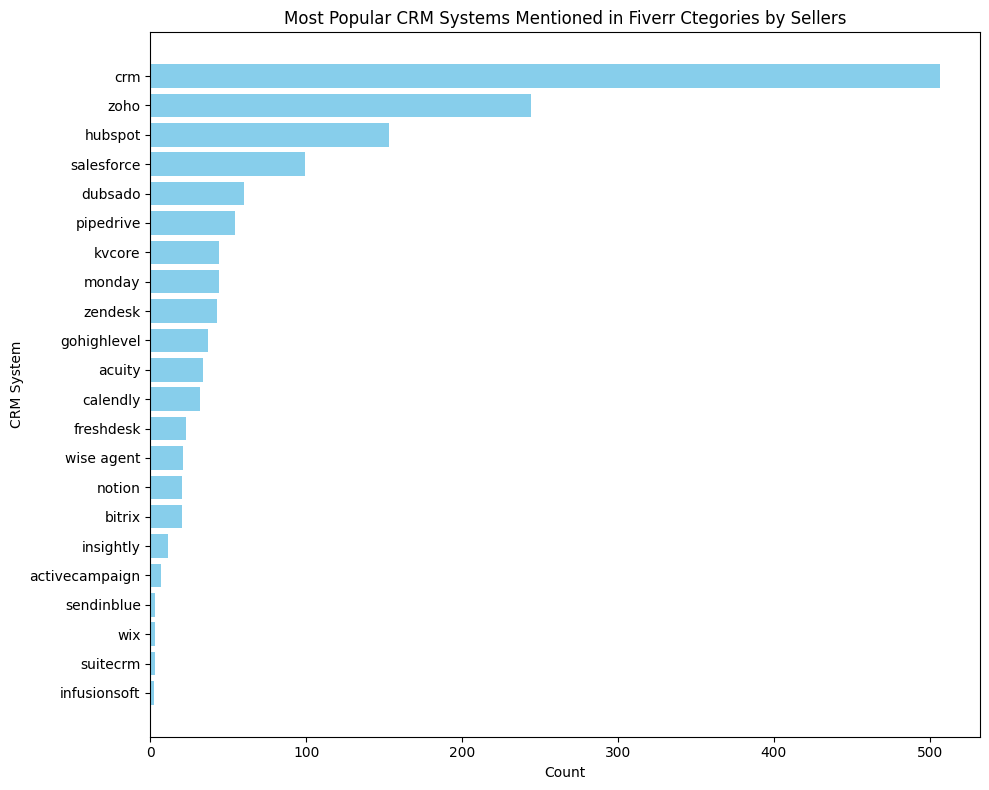

In [67]:
# Sort the DataFrame by count in descending order
crm_counts_df = crm_counts_df.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(crm_counts_df['CRM_System'], crm_counts_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('CRM System')
plt.title('Most Popular CRM Systems Mentioned in Fiverr Ctegories by Sellers')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.tight_layout()

# Show the plot
plt.show()
# Drop "crm" keyword with calculating mentioning and correlation of mentioning!!

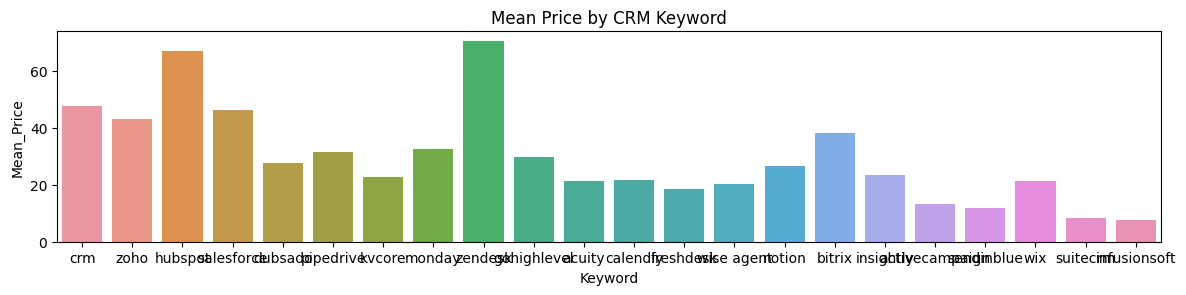

In [68]:
# Create a list of CRM keywords from the crm_counts_df
crm_keywords = crm_counts_df['CRM_System'].tolist()

# Create a new column in the DataFrame to indicate presence of CRM keywords
for keyword in crm_keywords:
    df[keyword] = df['Description'].str.contains(keyword, case=False, na=False)

# Calculate statistics for each CRM keyword
crm_stats = []
for keyword in crm_keywords:
    stats = {
        'Keyword': keyword,
        'Mean_Price': df[df[keyword]]['Price'].mean(),
        'Median_Price': df[df[keyword]]['Price'].median(),
        'Mean_Rating': df[df[keyword]]['Rating_Score'].mean(),
        'Median_Rating': df[df[keyword]]['Rating_Score'].median(),
        #'Mean_Orders': df[df[keyword]]['Number_of_Orders'].mean(),
        #'Median_Orders': df[df[keyword]]['Number_of_Orders'].median()
    }
    crm_stats.append(stats)

# Convert statistics to a DataFrame for visualization
crm_stats_df = pd.DataFrame(crm_stats)

# Create bar plots to visualize statistics
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
sns.barplot(data=crm_stats_df, x='Keyword', y='Mean_Price')
plt.title('Mean Price by CRM Keyword')

#plt.subplot(3, 1, 2)
#sns.barplot(data=crm_stats_df, x='Keyword', y='Mean_Orders')
#plt.title('Mean Number of Orders by CRM Keyword')

plt.tight_layout()
plt.show()


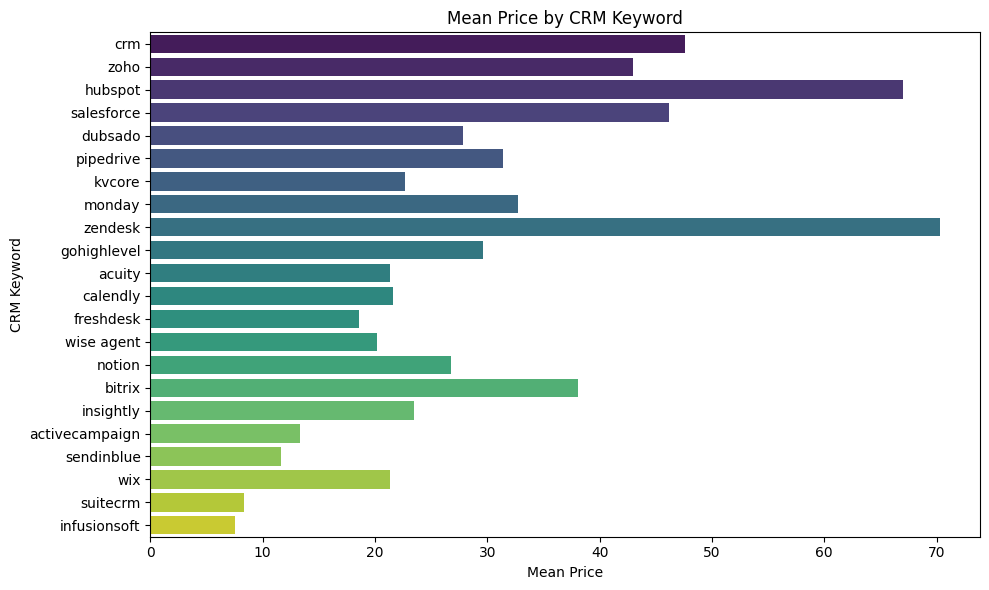

In [69]:
# Create bar plot to visualize Mean Price by CRM Keyword
plt.figure(figsize=(10, 6))
sns.barplot(data=crm_stats_df, x='Mean_Price', y='Keyword', palette='viridis')
plt.xlabel('Mean Price')
plt.ylabel('CRM Keyword')
plt.title('Mean Price by CRM Keyword')
plt.tight_layout()
plt.show()
#In this modified code, the crm_stats_df DataFrame is sorted by the Mean_Price column in descending order using the sort_values function. Then, the bar plot is created using sns.barplot, and the palette parameter is set to 'viridis' for a visually appealing color scheme. The resulting bar plot will show the CRM keywords sorted by mean price in descending orde